#### What is a outlier?
Outlier is a data point which is distinct from the all other observations. A data point that lies outside the overall distribution of the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### What is the criteria for identifying the outlier?

1. Data file that falls outside 1.5 times of an interquatile range above the 3rd Quanrtile and below 1st quartile
2. Data point that falls outside 3 Standard deviation and we can use Z-score . if the Z-score falls outside the 2 Standard deviation


#### What is the  reason for the existence of the outlier in the dataset?
1. Varailbility in the data
2. Experimental measurement error

#### What are the impacts of having the outlier in the data?
1. It causes the varies problems during the statistical analysis
2. It may cause significant impact on the mean and standard deviation and total varience 

#### Various ways for finding the outlier?
1. Using the scatter plots
2. Using the box plots
3. Using the Z- score
4. Using the IQR interquartile range

In [5]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

### Detecting the Outlier using the Z-score

#### Using the Z-score
z = (observation- mean)/ Standard deviation

z = (X-m)/standard deviation

In [6]:
outliers = []
def detect_outliers(data):
    thresold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z = (i-mean)/std
        if thresold < z:
            outliers.append(i)
    return outliers

In [7]:
detect_outliers(dataset)

[102, 107, 108]

# Interquartile Range

75% - 25% values in the dataset

1. Arrange in the data in the increasing order
2. Calculate the 1st and 3rd Quartile
3. Find the interquartile (q3-q1)
4. Find the lower bond Q1*1.5
5. Find the upper bond Q3*1.5

In [8]:
data = sorted(dataset)

In [16]:
quar1, quar3 =  np.percentile(dataset, [25,75])

In [17]:
# Finding the IQR
iqr  = quar3 - quar1

In [19]:
# Finding the lower and higer bound 
higher = quar3+(1.5*iqr)
lower = quar1-(1.5*iqr)

In [20]:
print(lower, higher)

7.5 19.5


{'whiskers': [<matplotlib.lines.Line2D at 0x15f8cc3208>,
 'caps': [<matplotlib.lines.Line2D at 0x15f8cc3c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f8cc07c8>],
 'medians': [<matplotlib.lines.Line2D at 0x15f8ccbac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f82debc8>],
 'means': []}

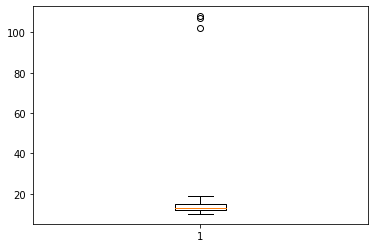

In [21]:
plt.boxplot(data)

In [25]:
# Removing the outliers using the pandas
# For that import pandas library
import pandas as pd

In [28]:
data = pd.Series(data)

array([ 10,  10,  10,  10,  10,  11,  11,  12,  12,  12,  12,  12,  12,
        12,  13,  13,  13,  13,  14,  14,  14,  14,  14,  14,  15,  15,
        15,  15,  15,  17,  19, 102, 107, 108], dtype=int64)

In [35]:
data_new = data.loc[(lower < data.values) & (higher > data.values)]